# Semi-supervised synthetic data validation

### Importing necessary libraries

In [1]:
import numpy as np
from library.generators.NextConvGeN import NextConvGeN


2023-05-11 10:39:31.064178: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-11 10:39:31.064195: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
from fdc.clustering import *

In [3]:
import pandas as pd

### Importing data

In [4]:
data=pd.read_csv('preprocessed_cirrhosis.csv')

In [5]:
data=data.drop(['Stage'],axis=1) #dropping target column

In [6]:
data

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2011,1,0.0,23376,0,0.0,1.0,0.0,0,1.1,187.0,3.69,12.0,654.000000,110.566667,58.0,139.0,10.5
1,4795,0,1.0,12419,0,0.0,0.0,0.0,0,1.8,132.0,3.24,17.0,423.000000,114.085000,46.0,203.0,18.0
2,1581,0,0.0,24472,0,0.0,0.0,0.0,0,0.7,246.0,3.06,33.0,3561.533333,111.656667,69.0,165.0,10.0
3,3282,1,0.0,19567,0,0.0,1.0,0.0,1,2.3,260.0,3.18,231.0,11320.200000,105.780000,94.0,216.0,12.4
4,140,1,0.0,25340,1,0.0,0.0,1.0,2,2.4,168.0,2.56,225.0,1056.000000,120.900000,75.0,108.0,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,4184,0,1.0,11868,0,0.0,0.0,0.0,0,0.5,320.0,3.54,51.0,1243.000000,122.450000,80.0,225.0,10.0
414,3388,0,1.0,22836,0,0.0,0.0,0.0,0,0.6,212.0,4.03,10.0,648.000000,71.300000,77.0,316.0,17.1
415,1569,0,1.0,18435,0,0.0,1.0,0.0,0,1.0,321.0,3.50,94.0,955.000000,111.000000,177.0,289.0,9.7
416,2855,0,0.0,19724,0,0.0,1.0,0.0,0,1.4,251.0,3.82,24.0,2958.366667,112.438333,73.0,249.0,10.3


In [7]:
np.random.seed(42)
data=data.sample(frac=1)

In [8]:
values=['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos',
        'SGOT','Tryglicerides','Platelets','Prothrombin','Ascites','Hepatomegaly','Spiders','Edema',
       'Status','Drug','Sex']

In [9]:
data=data[values]

### UMAP on entire data

In [10]:
from fdc.fdc import feature_clustering

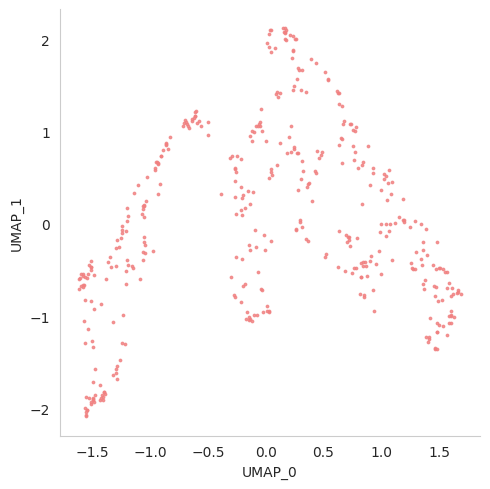

In [11]:
np.random.seed(42)
umap_emb=feature_clustering(30,0.01,'euclidean',data,True)

In [12]:
from fdc.clustering import Clustering

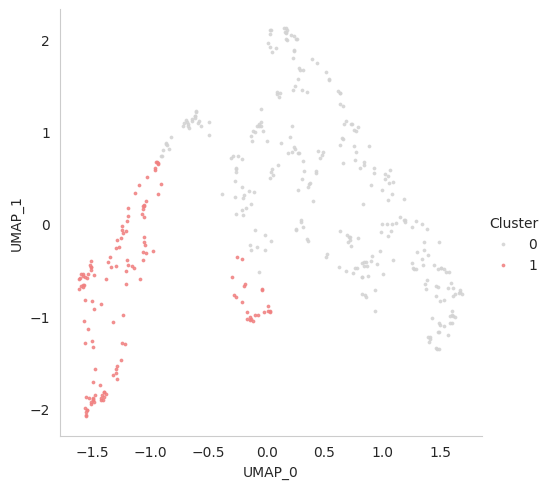

In [13]:
np.random.seed(42)
umap_clustering=Clustering(umap_emb,umap_emb,True)
umap_cluster_list,umap_cluster_counts=umap_clustering.K_means(2)

### Feature-type Distributed Clustering (FDC)

In [14]:
cont_list=['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']

ord_list=['Ascites','Hepatomegaly','Spiders','Edema']

nom_list=['Status','Drug','Sex']


FDC.normalize (init): 0.00001 / 0.000s
FDC.normalize (clustering CONT): 1.79581 / 1.796s
FDC.normalize (clustering ORD): 4.30493 / 6.101s
FDC.normalize (clustering NOM): 3.93273 / 10.033s
FDC.normalize (concat): 0.00022 / 10.034s
FDC.normalize (umap 5 -> 2): 1.52524 / 11.559s
FDC.normalize (array -> DataFrame): 0.00028 / 11.559s


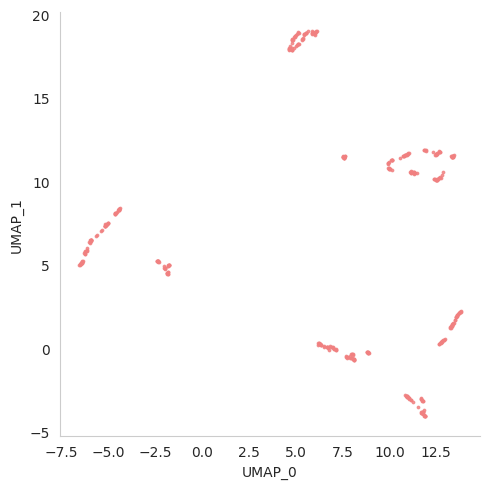

FDC.normalize (plotting): 0.41961 / 11.979s
FDC.normalize (array -> DataFrame): 0.00020 / 11.979s
FDC.normalize (total): 0.00001 / 11.979s


In [15]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)

fdc = FDC(clustering_cont=Clustering('euclidean',30,0.01)
          , clustering_ord=Clustering(canberra_modified,30,0.01)
          , clustering_nom=Clustering('hamming',30,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(data,cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

### Clustering using K-means

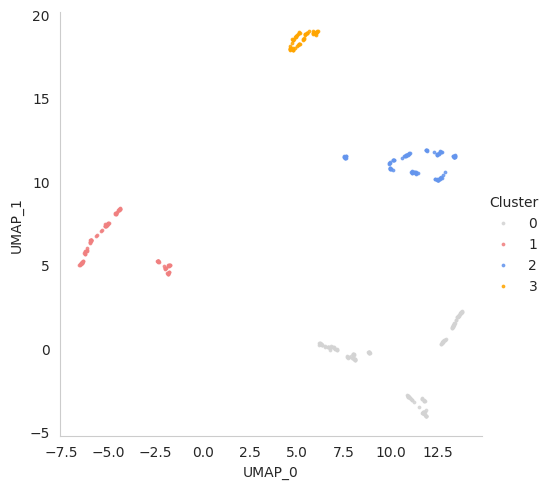

In [16]:
from fdc.clustering import *
np.random.seed(42)
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

In [17]:
cluster_counts

array([148, 100, 111,  59])

### Concatinating cluster labels as Target to original data

In [18]:
data["Target"]=cluster_list

In [19]:
data

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Ascites,Hepatomegaly,Spiders,Edema,Status,Drug,Sex,Target
321,3098,20440,0.8,263.0,3.35,27.0,1636.0,116.250000,69.0,206.0,9.8,0.0,0.0,0.0,0,0,0.0,0,0
324,3992,14684,1.2,256.0,3.60,74.0,724.0,141.050000,108.0,430.0,10.0,0.0,0.0,0.0,0,0,0.0,0,0
388,1908,14019,1.5,253.0,3.79,67.0,1006.0,139.500000,106.0,341.0,9.7,0.0,1.0,1.0,0,0,0.0,0,3
56,326,18199,6.6,244.0,3.41,199.0,1819.0,170.500000,91.0,132.0,12.1,0.0,1.0,1.0,1,1,1.0,0,3
153,2563,21185,3.0,217.0,3.46,13.0,414.0,64.583333,62.0,109.0,10.4,0.0,0.0,0.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1433,20510,0.5,198.0,3.77,38.0,911.0,57.000000,56.0,280.0,9.8,0.0,0.0,0.0,0,0,1.0,0,0
106,4256,16034,0.6,216.0,3.94,28.0,601.0,60.450000,188.0,211.0,13.0,0.0,0.0,0.0,0,0,1.0,1,0
270,4191,16967,1.4,427.0,3.70,105.0,1909.0,182.900000,171.0,123.0,11.0,0.0,1.0,0.0,0,1,0.0,1,1
348,216,19246,24.5,1092.0,3.35,233.0,3740.0,147.250000,432.0,399.0,15.2,1.0,1.0,1.0,0,1,1.0,0,3


### Train-val split

In [20]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(np.array(data.drop(["Target"],axis=1)), np.array(cluster_list), test_size = 0.25, random_state = 42)

### Gradient boosting classifier for original traing data (Model-1)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)
model_1 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


In [22]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(model_1, train_features, train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.88888889 0.9047619  0.82539683 0.88709677 0.93548387]
Avg : 0.8883256528417818


In [23]:
model_1.fit(train_features,  train_labels)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Preparing training data for synthetic data generation

In [24]:
train_features=pd.DataFrame(train_features)

In [25]:
train_features["Target"]=train_labels

In [26]:
values=['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos',
        'SGOT','Tryglicerides','Platelets','Prothrombin','Ascites','Hepatomegaly','Spiders','Edema',
       'Status','Drug','Sex',"Target"]

In [27]:
train_features.to_csv('Liver_cirrhosis_training_data(semi_sup).csv',index=False)

In [28]:
hold_out_data=pd.DataFrame(test_features)
hold_out_data['Target']=test_labels
hold_out_data.columns=values
hold_out_data.to_csv('Liver_cirrhosis_hold_out__data(semi_sup).csv',index=False)

In [29]:
dicts = {}
for i in range(len(values)):
        dicts[values[i]]=i


In [30]:
train_features.rename(columns=dicts,inplace=True)


In [31]:
train_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1375.0,22646.0,7.3,246.0,3.49,24.0,797.000000,121.175000,113.0,189.0,10.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,3395.0,19295.0,3.2,259.0,4.30,208.0,1040.000000,110.050000,78.0,268.0,11.7,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
2,785.0,19358.0,12.6,196.0,2.87,73.0,289.000000,145.333333,68.0,114.0,11.8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,786.0,16839.0,2.9,332.0,3.60,86.0,1492.000000,134.850000,103.0,277.0,11.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2
4,4509.0,23331.0,0.7,370.0,3.78,24.0,5833.000000,73.530000,86.0,390.0,10.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2574.0,19237.0,0.5,251.0,4.52,31.0,784.000000,74.400000,58.0,361.0,10.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
309,1444.0,19002.0,5.2,1128.0,3.68,53.0,3228.000000,165.850000,166.0,421.0,9.9,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3
310,2716.0,19358.0,0.6,251.0,4.19,25.0,1435.033333,71.121667,58.0,330.0,9.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
311,3458.0,20600.0,0.6,172.0,4.64,20.0,666.000000,54.250000,69.0,265.0,10.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## NextConvGen

### FDC for searcing neighbors for synthetic data generation

In [32]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
fdc = FDC()
fdc.ord_list=list(range(data.shape[1]))[11:15]
fdc.nom_list = list(range(data.shape[1]))[15:]
fdc.cont_list =list(range(data.shape[1]))[:11]

In [33]:
train_features=np.array(train_features)

### Preapring and training NextConvGen model

In [34]:
gen = NextConvGeN(train_features.shape[1], neb=5, fdc=fdc)

In [35]:
gen.reset(train_features)

2023-05-11 10:39:50.233240: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-11 10:39:50.233258: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-11 10:39:50.233272: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f61d203ff696): /proc/driver/nvidia/version does not exist
2023-05-11 10:39:50.233394: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
gen.train(train_features)

FDC.normalize (init): 0.00001 / 0.000s
FDC.normalize (clustering CONT): 1.65665 / 1.657s
FDC.normalize (clustering ORD): 3.01921 / 4.676s
FDC.normalize (clustering NOM): 2.32524 / 7.001s
FDC.normalize (concat): 0.00007 / 7.001s
FDC.normalize (total): 0.00001 / 7.001s
|N| = (313, 5)
|D| = (313, 19)


### Generating 1000 synthetic points and randomly selecting the same legth of original training points for evaluation

In [37]:
from fdc.NN_models import *
np.random.seed(42)
syn_train_data = syn_data_gen(gen,1000,values)

In [38]:
def balanced_synthetic_data(org_data,syn_data):
    import math
    org_data_len = org_data.shape[0]
    class_counts = org_data.iloc[:,-1].value_counts()
    column_names = list( syn_data.columns)
    df_list=[]
    for i in range(len(class_counts)):
        m = len(syn_data[syn_data['Target']==i])

        if m < class_counts[i]:
            run=math.ceil(class_counts[i]/m)
            syn_data = syn_data_gen(gen,org_data_len*run,values)
        c_i=syn_data[syn_data['Target']==i].sample(n=int(class_counts[i]),axis=0,random_state=42)
        df_list.append(c_i)
    balanced_df=pd.concat(df_list,names=column_names)
    return balanced_df

In [39]:
syn_train_data=balanced_synthetic_data(pd.DataFrame(train_features),syn_train_data)

In [40]:
syn_train_data['Target'].value_counts()

0.0    111
2.0     86
1.0     71
3.0     45
Name: Target, dtype: int64

In [41]:
syn_train_data.to_csv('Liver_cirrhosis_NextConvGen_syn_data.csv',index=False)

In [42]:
np.random.seed(42)
syn_train_data=syn_train_data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(np.shape(syn_train_data)[0])]

syn_train_data.set_index(pd.Series(i), inplace=True)

In [43]:
syn_train_data

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Ascites,Hepatomegaly,Spiders,Edema,Status,Drug,Sex,Target
0,2563.000000,21185.000000,3.000000,217.000000,3.460000,13.000000,414.000000,64.583336,62.000000,109.000000,10.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2393.830811,18738.429688,0.626447,251.334488,3.592131,26.614006,1345.406372,92.236542,58.722092,290.075562,10.496481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2905.396484,18997.583984,1.349564,307.718628,3.578779,68.864151,2617.984863,98.334206,115.623154,283.047302,10.645513,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
3,2487.746094,18720.740234,2.851137,280.160980,3.471269,118.756325,4131.479492,142.879883,141.034653,185.471695,11.434166,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,2683.538330,18145.859375,0.654361,241.013245,3.773805,48.170128,944.381531,66.526245,77.870125,246.027191,10.603357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,1560.000000,14610.000000,0.900000,226.000000,3.500000,22.000000,2228.699951,132.929993,85.000000,117.000000,10.900000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
309,3151.923828,20036.845703,0.754224,296.333099,3.901993,47.910072,1059.000366,127.687515,120.785378,239.458557,10.619194,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
310,838.999939,13878.999023,2.000000,246.999985,3.160000,68.999992,1049.999878,116.999992,87.999992,334.999969,10.499999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,857.700745,21435.572266,5.635645,225.053223,3.212837,137.430405,774.626343,146.010315,90.684135,134.127136,12.383451,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0


In [44]:
def exact_match_score(original_df, synthetic_df):
    original_data=original_df.drop('Target',axis=1,inplace=False)
    synthetic_data=synthetic_df.drop('Target',axis=1,inplace=False)
    n_matches = 0
    repeated=[]
    for i in range(synthetic_data.shape[0]):
        if (original_data == synthetic_data.iloc[i, :]).all(axis=1).any():
            repeated_data=synthetic_data.iloc[i, :]
            repeated.append(repeated_data)
            n_matches += 1    
    print('The number of data points repeated in the synthetic data are',n_matches / synthetic_data.shape[0])
    return pd.DataFrame(repeated)

In [45]:
original_df=pd.read_csv('Liver_cirrhosis_training_data(semi_sup).csv')

In [46]:
original_df.columns=values

In [47]:
exact_match_score(original_df,syn_train_data)

The number of data points repeated in the synthetic data are 0.0


""


In [48]:
len(syn_train_data[syn_train_data.duplicated(keep=False)])

27

### Train test split on synthetic data

In [49]:
syn_train_features, syn_test_features, syn_train_labels, syn_test_labels = train_test_split(np.array(syn_train_data.drop(["Target"],axis=1)), np.array(syn_train_data["Target"]), test_size = 0.25, random_state = 42)

### Gradient boosting classifier on NextConvGen generated synthetic training data  (Model-2)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
NextConvGen_model_2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


### 5 Fold Cross Validation

In [51]:
score_lr=cross_val_score(NextConvGen_model_2, syn_train_features, syn_train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.93617021 0.80851064 0.91489362 0.95744681 0.82608696]
Avg : 0.8886216466234969


In [52]:
NextConvGen_model_2.fit(syn_train_features,syn_train_labels )

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Case-1: predicting validation data using Model-1


In [53]:
x=model_1.predict(np.array(test_features))
cluster_wise_F1score(list(test_labels),list(x))

F1_Score of cluster 0 is 0.935064935064935
Geometric mean of cluster 0 is 0.9357754408380654
Correctly predicted data points in cluster 0 is 97.2972972972973%


F1_Score of cluster 1 is 0.888888888888889
Geometric mean of cluster 1 is 0.8913376232498489
Correctly predicted data points in cluster 1 is 82.75862068965517%


F1_Score of cluster 2 is 0.9803921568627451
Geometric mean of cluster 2 is 0.9805806756909202
Correctly predicted data points in cluster 2 is 100.0%


F1_Score of cluster 3 is 0.9285714285714286
Geometric mean of cluster 3 is 0.9285714285714286
Correctly predicted data points in cluster 3 is 92.85714285714286%


weigted average F1_Score of all clusters is 0.9322379456833239
weighted average Geometric mean of all clusters is 0.933209516928829
weighted average of Correctly predicted data points in all clusters is 93.33333333333334%


### Case-2: Predicting validation data using Model-2


In [54]:
y=NextConvGen_model_2.predict(np.array(test_features))

cluster_wise_F1score(list(test_labels),list(y))

F1_Score of cluster 0 is 0.8860759493670887
Geometric mean of cluster 0 is 0.8878560065057218
Correctly predicted data points in cluster 0 is 94.5945945945946%


F1_Score of cluster 1 is 0.912280701754386
Geometric mean of cluster 1 is 0.9124211282466754
Correctly predicted data points in cluster 1 is 89.65517241379311%


F1_Score of cluster 2 is 0.8085106382978724
Geometric mean of cluster 2 is 0.8101627221513197
Correctly predicted data points in cluster 2 is 76.0%


F1_Score of cluster 3 is 0.8148148148148148
Geometric mean of cluster 3 is 0.8153742483272113
Correctly predicted data points in cluster 3 is 78.57142857142857%


weigted average F1_Score of all clusters is 0.8653440365934637
weighted average Geometric mean of all clusters is 0.866478023716469
weighted average of Correctly predicted data points in all clusters is 86.66666666666669%


### Comparing predicted values from Case-1 & Case-2

In [55]:
cluster_wise_F1score(list(x),list(y))

F1_Score of cluster 0 is 0.8780487804878048
Geometric mean of cluster 0 is 0.8783100656536799
Correctly predicted data points in cluster 0 is 90.0%


F1_Score of cluster 1 is 0.8679245283018867
Geometric mean of cluster 1 is 0.8693182879212226
Correctly predicted data points in cluster 1 is 92.0%


F1_Score of cluster 2 is 0.7916666666666666
Geometric mean of cluster 2 is 0.7944299095067362
Correctly predicted data points in cluster 2 is 73.07692307692307%


F1_Score of cluster 3 is 0.7407407407407408
Geometric mean of cluster 3 is 0.7412493166611012
Correctly predicted data points in cluster 3 is 71.42857142857143%


weigted average F1_Score of all clusters is 0.83594064886441
weighted average Geometric mean of all clusters is 0.837124075281984
weighted average of Correctly predicted data points in all clusters is 83.8095238095238%


### UMAP on synthetic data

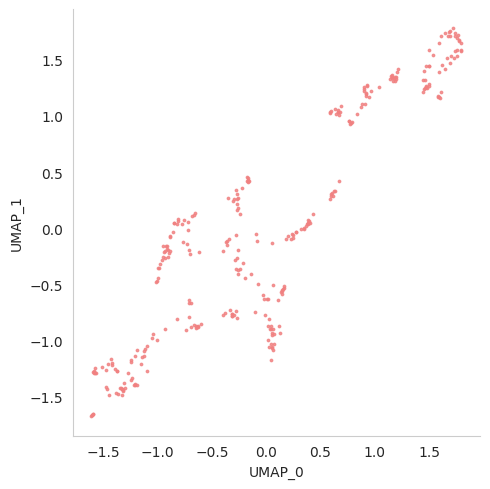

In [56]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
syn_emb_low=feature_clustering(30,0.01,'euclidean',syn_train_data.drop(["Target"],axis=1),True)

### FDC on synthetic data

FDC.normalize (init): 0.00001 / 0.000s
FDC.normalize (clustering CONT): 1.03977 / 1.040s
FDC.normalize (clustering ORD): 2.72097 / 3.761s
FDC.normalize (clustering NOM): 3.50276 / 7.264s
FDC.normalize (concat): 0.00007 / 7.264s
FDC.normalize (umap 5 -> 2): 1.02115 / 8.285s
FDC.normalize (array -> DataFrame): 0.00029 / 8.285s


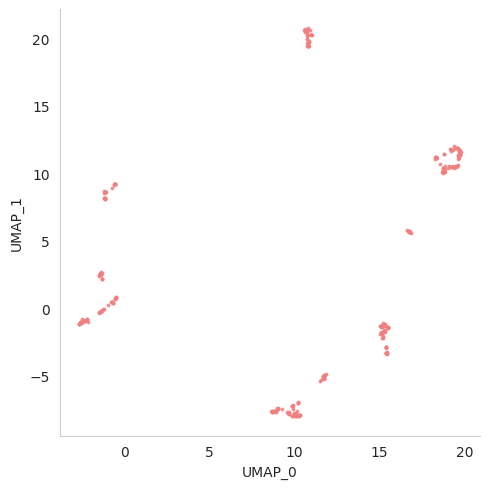

FDC.normalize (plotting): 0.40084 / 8.686s
FDC.normalize (array -> DataFrame): 0.00025 / 8.686s
FDC.normalize (total): 0.00001 / 8.686s


In [57]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)
fdc = FDC(clustering_cont=Clustering('euclidean',30,0.01)
          , clustering_ord=Clustering(canberra_modified,30,0.01)
          , clustering_nom=Clustering('hamming',30,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(syn_train_data.drop(["Target"],axis=1),cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

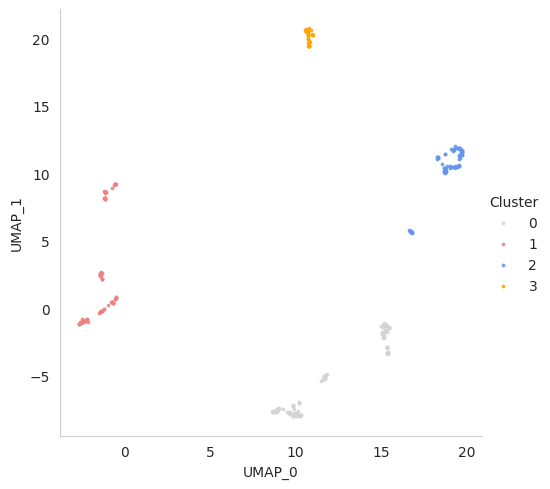

In [58]:
from fdc.clustering import *
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

In [59]:
cluster_counts

array([114,  89,  76,  34])

## CTGAN

In [60]:
train_features= pd.DataFrame(train_features)

In [61]:
dicts = {}
for i in range(len(values)):
        dicts[i]=values[i]


In [62]:
train_features.rename(columns=dicts,inplace=True)


In [63]:
from sdv.tabular import CTGAN

In [64]:
gen=CTGAN()

In [65]:
gen.fit(train_features)

### Generating 1000 synthetic points and randomly selecting the same legth of original training points for evaluation

In [66]:
syn_train_data= gen.sample(num_rows=1000)

In [67]:
from fdc.NN_models import *
CTGAN_syn_data=balanced_synthetic_data_CTGAN(train_features,syn_train_data,gen)

In [68]:
CTGAN_syn_data.to_csv('Liver_cirrhosis_CTGAN_syn_data.csv',index=False)

In [69]:
np.random.seed(42)
CTGAN_syn_data=CTGAN_syn_data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(np.shape(CTGAN_syn_data)[0])]

CTGAN_syn_data.set_index(pd.Series(i), inplace=True)

In [70]:
exact_match_score(original_df,CTGAN_syn_data)

The number of data points repeated in the synthetic data are 0.0


""


In [71]:
len(CTGAN_syn_data[CTGAN_syn_data.duplicated(keep=False)])

0

### Train-test split on CTGAN generated synthetic data points

In [72]:
syn_train_features, syn_test_features, syn_train_labels, syn_test_labels = train_test_split(np.array(CTGAN_syn_data.drop(["Target"],axis=1)), np.array(CTGAN_syn_data["Target"]), test_size = 0.25, random_state = 42)

### Gradient boosting classifier on CTGAN generated synthetic training data  (Model-2)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
CTGAN_model_2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


### 5 Fold Cross validation

In [74]:
score_lr=cross_val_score(CTGAN_model_2, syn_train_features, syn_train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.21276596 0.17021277 0.21276596 0.27659574 0.23913043]
Avg : 0.22229417206290472


In [75]:
CTGAN_model_2.fit(syn_train_features,syn_train_labels )

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Case-1: predicting validation data using Model-1


In [76]:
x=model_1.predict(np.array(test_features))
cluster_wise_F1score(list(test_labels),list(x))

F1_Score of cluster 0 is 0.935064935064935
Geometric mean of cluster 0 is 0.9357754408380654
Correctly predicted data points in cluster 0 is 97.2972972972973%


F1_Score of cluster 1 is 0.888888888888889
Geometric mean of cluster 1 is 0.8913376232498489
Correctly predicted data points in cluster 1 is 82.75862068965517%


F1_Score of cluster 2 is 0.9803921568627451
Geometric mean of cluster 2 is 0.9805806756909202
Correctly predicted data points in cluster 2 is 100.0%


F1_Score of cluster 3 is 0.9285714285714286
Geometric mean of cluster 3 is 0.9285714285714286
Correctly predicted data points in cluster 3 is 92.85714285714286%


weigted average F1_Score of all clusters is 0.9322379456833239
weighted average Geometric mean of all clusters is 0.933209516928829
weighted average of Correctly predicted data points in all clusters is 93.33333333333334%


### Case-2: predicting validation data using Model-2


In [77]:
y=CTGAN_model_2.predict(np.array(test_features))

cluster_wise_F1score(list(test_labels),list(y))

F1_Score of cluster 0 is 0.2745098039215686
Geometric mean of cluster 0 is 0.3075623426146228
Correctly predicted data points in cluster 0 is 18.91891891891892%


F1_Score of cluster 1 is 0.2173913043478261
Geometric mean of cluster 1 is 0.2251886745555225
Correctly predicted data points in cluster 1 is 17.24137931034483%


F1_Score of cluster 2 is 0.2264150943396226
Geometric mean of cluster 2 is 0.2267786838055363
Correctly predicted data points in cluster 2 is 24.0%


F1_Score of cluster 3 is 0.26666666666666666
Geometric mean of cluster 3 is 0.31524416249564025
Correctly predicted data points in cluster 3 is 57.14285714285714%


weigted average F1_Score of all clusters is 0.2462373453619895
weighted average Geometric mean of all clusters is 0.2666015581802721
weighted average of Correctly predicted data points in all clusters is 24.761904761904766%


### Comparing predicted values from Case-1 & Case-2

In [78]:
cluster_wise_F1score(list(x),list(y))

F1_Score of cluster 0 is 0.29629629629629634
Geometric mean of cluster 0 is 0.3380617018914066
Correctly predicted data points in cluster 0 is 20.0%


F1_Score of cluster 1 is 0.2380952380952381
Geometric mean of cluster 1 is 0.242535625036333
Correctly predicted data points in cluster 1 is 20.0%


F1_Score of cluster 2 is 0.22222222222222224
Geometric mean of cluster 2 is 0.22237479499833035
Correctly predicted data points in cluster 2 is 23.076923076923077%


F1_Score of cluster 3 is 0.26666666666666666
Geometric mean of cluster 3 is 0.31524416249564025
Correctly predicted data points in cluster 3 is 57.14285714285714%


weigted average F1_Score of all clusters is 0.2601461325270849
weighted average Geometric mean of all clusters is 0.28362877758533467
weighted average of Correctly predicted data points in all clusters is 25.714285714285715%


### UMAP on CTGAN synthetic data

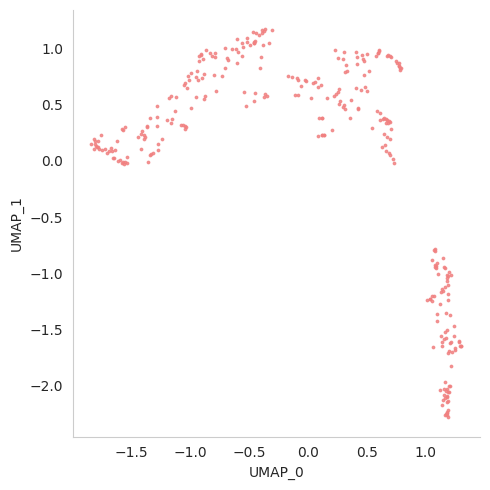

In [79]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
syn_emb_low=feature_clustering(30,0.01,'euclidean',CTGAN_syn_data.drop(["Target"],axis=1),True)

### FDC on CTGAN synthetic data

FDC.normalize (init): 0.00001 / 0.000s
FDC.normalize (clustering CONT): 1.04704 / 1.047s
FDC.normalize (clustering ORD): 2.40231 / 3.449s
FDC.normalize (clustering NOM): 2.59650 / 6.046s
FDC.normalize (concat): 0.00024 / 6.046s
FDC.normalize (umap 5 -> 2): 1.14597 / 7.192s
FDC.normalize (array -> DataFrame): 0.00030 / 7.192s


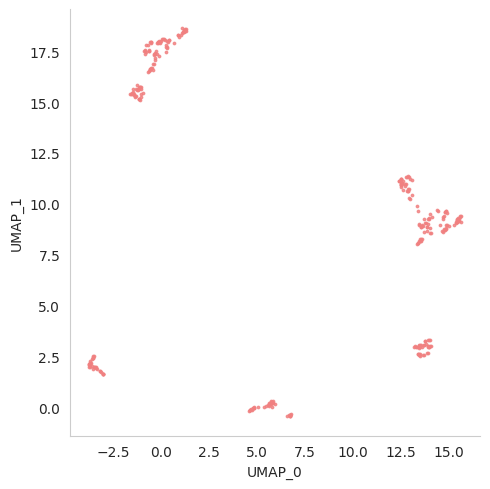

FDC.normalize (plotting): 0.42173 / 7.614s
FDC.normalize (array -> DataFrame): 0.00026 / 7.614s
FDC.normalize (total): 0.00001 / 7.614s


In [80]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)
fdc = FDC(clustering_cont=Clustering('euclidean',30,0.01)
          , clustering_ord=Clustering(canberra_modified,30,0.01)
          , clustering_nom=Clustering('hamming',30,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(CTGAN_syn_data.drop(["Target"],axis=1),cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

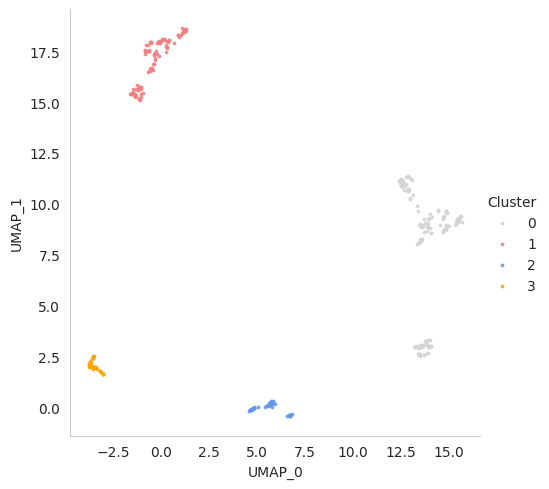

In [81]:
from fdc.clustering import *
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

## CTABGAN

train_features= pd.DataFrame(train_features)

dicts = {}
for i in range(len(values)):
        dicts[i]=values[i]


train_features.rename(columns=dicts,inplace=True)


In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from library.generators.ctab import CtabGan

In [83]:
gen=CtabGan()

In [84]:
gen.reset(train_features)

In [85]:
gen.train(train_features)

100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


### Generating 1000 synthetic points and randomly selecting the same legth of original training points for evaluation

In [86]:
CTABGAN_syn_data=  gen.generateData(1000)

In [87]:
CTABGAN_syn_data=pd.DataFrame(CTABGAN_syn_data)

In [88]:
CTABGAN_syn_data.rename(columns=dicts,inplace=True)
CTABGAN_syn_data

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Ascites,Hepatomegaly,Spiders,Edema,Status,Drug,Sex,Target
0,3250.354048,16004.643273,12.786408,256.522969,3.697746,86.911967,7713.587101,177.604046,222.794278,329.383286,10.084559,0.004716,0.998661,0.010492,1.831350,1.998978,0.020030,0.001897,2.034643
1,1436.811151,21736.672725,1.201830,472.828496,3.696096,49.199376,7602.761052,109.961008,147.650902,218.232444,10.123429,1.016785,0.003014,1.010142,1.854842,2.037966,1.006641,0.004160,2.006317
2,1421.285744,16083.335989,1.229088,256.605803,3.414596,193.536692,2213.727114,103.913035,148.745255,220.284705,10.624317,0.968423,1.005716,0.017864,1.007461,0.028327,1.009042,0.004384,2.047494
3,3241.530019,16219.575132,1.195374,379.016040,3.398954,345.471674,7122.236165,170.960722,234.998990,304.910176,10.188500,-0.000404,1.016291,1.017134,0.011218,1.010332,1.007548,0.004053,2.995508
4,1421.721434,16282.227605,4.046504,477.799065,3.693662,90.211293,1100.696374,168.922488,83.691810,309.254879,11.677790,0.004565,0.010163,0.012468,0.008048,0.023392,0.004684,0.006063,1.033367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1406.020799,15820.546992,12.803436,1111.037291,3.420476,92.146855,7193.914180,109.241232,83.523814,214.063756,10.858565,0.958306,1.012825,0.016479,1.908899,0.018074,0.998699,0.003102,1.011960
996,3236.208018,21884.079284,13.223400,257.290904,3.380416,95.301921,2468.737570,168.575433,240.176564,327.427515,15.536260,0.974579,1.009542,0.020442,0.010521,0.994874,1.007115,1.007990,3.018780
997,1424.184992,15808.221118,1.223907,458.282313,3.371290,341.543881,7168.600084,306.342818,82.148650,208.675294,11.876638,0.002719,0.027425,1.043417,0.006862,1.033478,0.008271,0.006232,0.066323
998,1429.385245,22020.122905,3.981638,254.525169,3.402820,201.994174,1067.610982,108.514511,82.735860,310.747273,15.820328,0.001766,0.018619,1.029327,0.979352,1.004710,1.010402,0.992975,2.022925


In [89]:
for i in values[7:]:
    CTABGAN_syn_data[i]=abs(np.round(CTABGAN_syn_data[i]))

In [90]:
CTABGAN_syn_data

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Ascites,Hepatomegaly,Spiders,Edema,Status,Drug,Sex,Target
0,3250.354048,16004.643273,12.786408,256.522969,3.697746,86.911967,7713.587101,178.0,223.0,329.0,10.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0
1,1436.811151,21736.672725,1.201830,472.828496,3.696096,49.199376,7602.761052,110.0,148.0,218.0,10.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,2.0
2,1421.285744,16083.335989,1.229088,256.605803,3.414596,193.536692,2213.727114,104.0,149.0,220.0,11.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0
3,3241.530019,16219.575132,1.195374,379.016040,3.398954,345.471674,7122.236165,171.0,235.0,305.0,10.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0
4,1421.721434,16282.227605,4.046504,477.799065,3.693662,90.211293,1100.696374,169.0,84.0,309.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1406.020799,15820.546992,12.803436,1111.037291,3.420476,92.146855,7193.914180,109.0,84.0,214.0,11.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0
996,3236.208018,21884.079284,13.223400,257.290904,3.380416,95.301921,2468.737570,169.0,240.0,327.0,16.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0
997,1424.184992,15808.221118,1.223907,458.282313,3.371290,341.543881,7168.600084,306.0,82.0,209.0,12.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
998,1429.385245,22020.122905,3.981638,254.525169,3.402820,201.994174,1067.610982,109.0,83.0,311.0,16.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0


In [91]:
from fdc.NN_models import *
CTABGAN_syn_data=balanced_synthetic_data_CTABGAN(train_features,CTABGAN_syn_data,gen)

In [92]:
CTABGAN_syn_data.to_csv('Liver_cirrhosis_CTABGAN_syn_data.csv',index=False)

In [93]:
np.random.seed(42)
CTABGAN_syn_data=CTABGAN_syn_data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(np.shape(CTABGAN_syn_data)[0])]

CTABGAN_syn_data.set_index(pd.Series(i), inplace=True)

In [94]:
exact_match_score(original_df,CTABGAN_syn_data)

The number of data points repeated in the synthetic data are 0.0


""


In [95]:
len(CTABGAN_syn_data[CTABGAN_syn_data.duplicated(keep=False)])

0

### Train-test split on CTABGAN generated synthetic data points

In [96]:
syn_train_features, syn_test_features, syn_train_labels, syn_test_labels = train_test_split(np.array(CTABGAN_syn_data.drop(["Target"],axis=1)), np.array(CTABGAN_syn_data["Target"]), test_size = 0.25, random_state = 42)

### Gradient boosting classifier on CTABGAN generated synthetic training data  (Model-2)

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
CTABGAN_model_2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


### 5 Fold Cross validation

In [98]:
score_lr=cross_val_score(CTABGAN_model_2, syn_train_features, syn_train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.38297872 0.10638298 0.19148936 0.25531915 0.2173913 ]
Avg : 0.23071230342275673


In [99]:
CTABGAN_model_2.fit(syn_train_features,syn_train_labels )

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Case-1: predicting validation data using Model-1


In [100]:
x=model_1.predict(np.array(test_features))
cluster_wise_F1score(list(test_labels),list(x))

F1_Score of cluster 0 is 0.935064935064935
Geometric mean of cluster 0 is 0.9357754408380654
Correctly predicted data points in cluster 0 is 97.2972972972973%


F1_Score of cluster 1 is 0.888888888888889
Geometric mean of cluster 1 is 0.8913376232498489
Correctly predicted data points in cluster 1 is 82.75862068965517%


F1_Score of cluster 2 is 0.9803921568627451
Geometric mean of cluster 2 is 0.9805806756909202
Correctly predicted data points in cluster 2 is 100.0%


F1_Score of cluster 3 is 0.9285714285714286
Geometric mean of cluster 3 is 0.9285714285714286
Correctly predicted data points in cluster 3 is 92.85714285714286%


weigted average F1_Score of all clusters is 0.9322379456833239
weighted average Geometric mean of all clusters is 0.933209516928829
weighted average of Correctly predicted data points in all clusters is 93.33333333333334%


### Case-2: predicting validation data using Model-2


In [101]:
y=CTABGAN_model_2.predict(np.array(test_features))

cluster_wise_F1score(list(test_labels),list(y))

F1_Score of cluster 0 is 0.35714285714285715
Geometric mean of cluster 0 is 0.35970085328337625
Correctly predicted data points in cluster 0 is 40.54054054054054%


F1_Score of cluster 1 is 0.26315789473684215
Geometric mean of cluster 1 is 0.3094922302950865
Correctly predicted data points in cluster 1 is 17.24137931034483%


F1_Score of cluster 2 is 0.2666666666666666
Geometric mean of cluster 2 is 0.2683281572999748
Correctly predicted data points in cluster 2 is 24.0%


F1_Score of cluster 3 is 0.4186046511627907
Geometric mean of cluster 3 is 0.4466625002869187
Correctly predicted data points in cluster 3 is 64.28571428571429%


weigted average F1_Score of all clusters is 0.31783806137714166
weighted average Geometric mean of all clusters is 0.3356731922529396
weighted average of Correctly predicted data points in all clusters is 33.33333333333334%


### Comparing predicted values from Case-1 & Case-2

In [102]:
cluster_wise_F1score(list(x),list(y))

F1_Score of cluster 0 is 0.4367816091954023
Geometric mean of cluster 0 is 0.4382023238137204
Correctly predicted data points in cluster 0 is 47.5%


F1_Score of cluster 1 is 0.29411764705882354
Geometric mean of cluster 1 is 0.33333333333333337
Correctly predicted data points in cluster 1 is 20.0%


F1_Score of cluster 2 is 0.2608695652173913
Geometric mean of cluster 2 is 0.2631174057921088
Correctly predicted data points in cluster 2 is 23.076923076923077%


F1_Score of cluster 3 is 0.46511627906976755
Geometric mean of cluster 3 is 0.4962916669854652
Correctly predicted data points in cluster 3 is 71.42857142857143%


weigted average F1_Score of all clusters is 0.3630327823515771
weighted average Geometric mean of all clusters is 0.37762440165974753
weighted average of Correctly predicted data points in all clusters is 38.095238095238095%


### UMAP on CTABGAN synthetic data

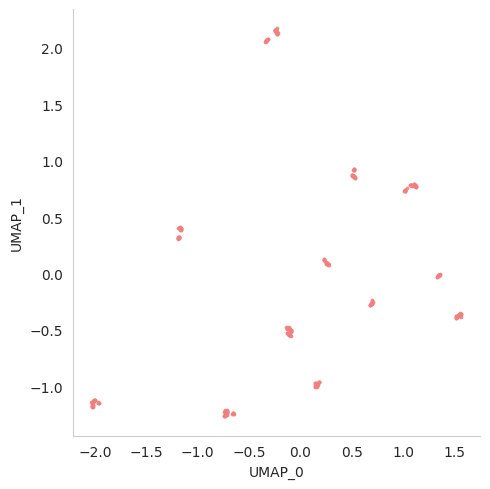

In [103]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
syn_emb_low=feature_clustering(30,0.01,'euclidean',CTABGAN_syn_data.drop(["Target"],axis=1),True)

### FDC on CTABGAN synthetic data

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 1.12363 / 1.124s
FDC.normalize (clustering ORD): 2.37121 / 3.495s
FDC.normalize (clustering NOM): 2.39080 / 5.886s
FDC.normalize (concat): 0.00008 / 5.886s
FDC.normalize (umap 5 -> 2): 1.02486 / 6.911s
FDC.normalize (array -> DataFrame): 0.00026 / 6.911s


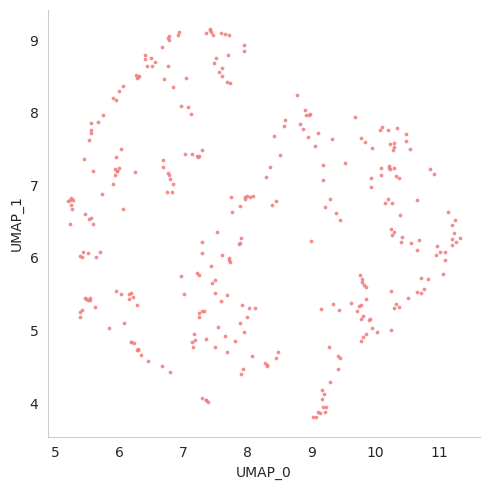

FDC.normalize (plotting): 0.40564 / 7.316s
FDC.normalize (array -> DataFrame): 0.00035 / 7.317s
FDC.normalize (total): 0.00002 / 7.317s


In [104]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)
fdc = FDC(clustering_cont=Clustering('euclidean',30,0.01)
          , clustering_ord=Clustering(canberra_modified,30,0.01)
          , clustering_nom=Clustering('hamming',30,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(CTABGAN_syn_data.drop(["Target"],axis=1),cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

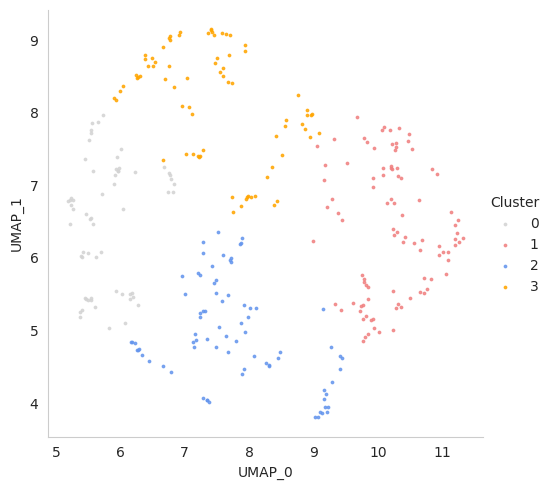

In [105]:
from fdc.clustering import *
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

### Tabddpm

### Generating 1000 synthetic points and randomly selecting the same legth of original training points for evaluation

In [106]:

Tabddpm_syn_data=pd.read_csv('Liver_cirrhosis_synth_data_semi_tddpm.csv')
Tabddpm_syn_data.drop(['Unnamed: 0'],axis=1,inplace=True)



In [107]:
Tabddpm_syn_data['Target'].value_counts()

0    320
1    274
2    265
3    141
Name: Target, dtype: int64

In [108]:
def balanced_synthetic_data(org_data,syn_data):
    import math
    org_data_len = org_data.shape[0]
    class_counts = org_data.iloc[:,-1].value_counts()
    column_names = list( syn_data.columns)
    df_list=[]
    for i in range(len(class_counts)):
        c_i=syn_data[syn_data['Target']==i].sample(n=int(class_counts[i]),axis=0,random_state=42)
        df_list.append(c_i)
    balanced_df=pd.concat(df_list,names=column_names)
    return balanced_df

In [109]:
Tabddpm_syn_data=balanced_synthetic_data(pd.DataFrame(train_features),Tabddpm_syn_data)

In [110]:
Tabddpm_syn_data['Target'].value_counts()

0    111
2     86
1     71
3     45
Name: Target, dtype: int64

In [111]:
Tabddpm_syn_data.to_csv('Liver_cirrhosis_Tabddpm_syn_data(semi_sup).csv',index=False)

In [112]:
np.random.seed(42)
Tabddpm_syn_data=Tabddpm_syn_data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(np.shape(Tabddpm_syn_data)[0])]

Tabddpm_syn_data.set_index(pd.Series(i), inplace=True)

In [113]:
exact_match_score(original_df,Tabddpm_syn_data)

The number of data points repeated in the synthetic data are 0.0


""


In [114]:
len(Tabddpm_syn_data[Tabddpm_syn_data.duplicated(keep=False)])

238

### Train test split on synthetic data

In [115]:
syn_train_features, syn_test_features, syn_train_labels, syn_test_labels = train_test_split(np.array(Tabddpm_syn_data.drop(["Target"],axis=1)), np.array(Tabddpm_syn_data["Target"]), test_size = 0.25, random_state = 42)

### Gradient boosting classifier on Tabddpm generated synthetic training data  (Model-2)

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
Tabddpm_model_2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


### 5 Fold Cross Validation

In [117]:
score_lr=cross_val_score(Tabddpm_model_2, syn_train_features, syn_train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.42553191 0.25531915 0.40425532 0.44680851 0.36956522]
Avg : 0.3802960222016651


In [118]:
Tabddpm_model_2.fit(syn_train_features,syn_train_labels )

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Case-1: predicting validation data using Model-1


In [119]:
x=model_1.predict(np.array(test_features))
cluster_wise_F1score(list(test_labels),list(x))

F1_Score of cluster 0 is 0.935064935064935
Geometric mean of cluster 0 is 0.9357754408380654
Correctly predicted data points in cluster 0 is 97.2972972972973%


F1_Score of cluster 1 is 0.888888888888889
Geometric mean of cluster 1 is 0.8913376232498489
Correctly predicted data points in cluster 1 is 82.75862068965517%


F1_Score of cluster 2 is 0.9803921568627451
Geometric mean of cluster 2 is 0.9805806756909202
Correctly predicted data points in cluster 2 is 100.0%


F1_Score of cluster 3 is 0.9285714285714286
Geometric mean of cluster 3 is 0.9285714285714286
Correctly predicted data points in cluster 3 is 92.85714285714286%


weigted average F1_Score of all clusters is 0.9322379456833239
weighted average Geometric mean of all clusters is 0.933209516928829
weighted average of Correctly predicted data points in all clusters is 93.33333333333334%


### Case-2: Predicting validation data using Model-2


In [120]:
y=Tabddpm_model_2.predict(np.array(test_features))

cluster_wise_F1score(list(test_labels),list(y))

F1_Score of cluster 0 is 0.17391304347826086
Geometric mean of cluster 0 is 0.2191986497404764
Correctly predicted data points in cluster 0 is 10.81081081081081%


F1_Score of cluster 1 is 0.39669421487603307
Geometric mean of cluster 1 is 0.4646418555974198
Correctly predicted data points in cluster 1 is 82.75862068965517%


F1_Score of cluster 2 is 0.0
Geometric mean of cluster 2 is 0.0
Correctly predicted data points in cluster 2 is 0.0%


F1_Score of cluster 3 is 0.0
Geometric mean of cluster 3 is 0.0
Correctly predicted data points in cluster 3 is 0.0%


weigted average F1_Score of all clusters is 0.1708468080009582
weighted average Geometric mean of all clusters is 0.20557108431164572
weighted average of Correctly predicted data points in all clusters is 26.666666666666668%


### Comparing predicted values from Case-1 & Case-2

In [121]:
cluster_wise_F1score(list(x),list(y))

F1_Score of cluster 0 is 0.24489795918367346
Geometric mean of cluster 0 is 0.31622776601683794
Correctly predicted data points in cluster 0 is 15.0%


F1_Score of cluster 1 is 0.3931623931623932
Geometric mean of cluster 1 is 0.47958315233127197
Correctly predicted data points in cluster 1 is 92.0%


F1_Score of cluster 2 is 0.0
Geometric mean of cluster 2 is 0.0
Correctly predicted data points in cluster 2 is 0.0%


F1_Score of cluster 3 is 0.0
Geometric mean of cluster 3 is 0.0
Correctly predicted data points in cluster 3 is 0.0%


weigted average F1_Score of all clusters is 0.18690455425149305
weighted average Geometric mean of all clusters is 0.23465418522814585
weighted average of Correctly predicted data points in all clusters is 27.61904761904762%


### UMAP on synthetic data

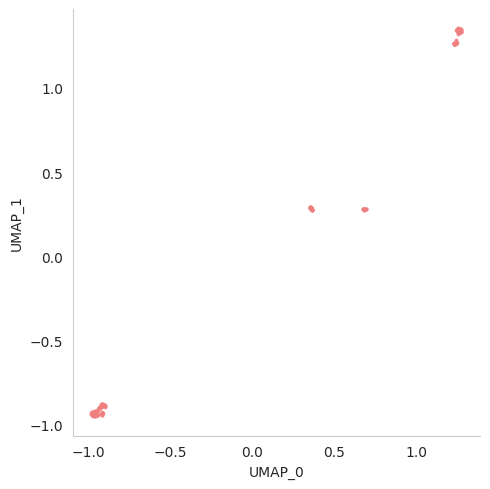

In [122]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
syn_emb_low=feature_clustering(30,0.01,'euclidean',Tabddpm_syn_data.drop(["Target"],axis=1),True)

### FDC on synthetic data

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 2.65953 / 2.660s
FDC.normalize (clustering ORD): 2.98726 / 5.647s
FDC.normalize (clustering NOM): 2.81388 / 8.461s
FDC.normalize (concat): 0.00007 / 8.461s
FDC.normalize (umap 5 -> 2): 1.02281 / 9.484s
FDC.normalize (array -> DataFrame): 0.00027 / 9.484s


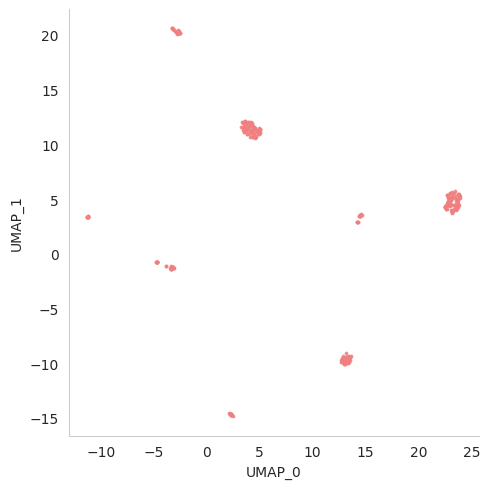

FDC.normalize (plotting): 0.41145 / 9.895s
FDC.normalize (array -> DataFrame): 0.00025 / 9.896s
FDC.normalize (total): 0.00001 / 9.896s


In [123]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)
fdc = FDC(clustering_cont=Clustering('euclidean',30,0.01)
          , clustering_ord=Clustering(canberra_modified,30,0.01)
          , clustering_nom=Clustering('hamming',30,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(Tabddpm_syn_data.drop(["Target"],axis=1),cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

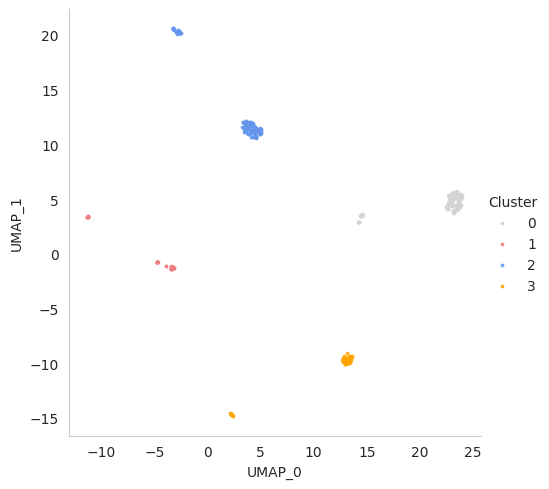

In [124]:
from fdc.clustering import *
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

In [125]:
cluster_counts

array([103,  40, 110,  60])